In [1]:
import os
import re
import pandas as pd
import numpy as np
import jieba.posseg as pseg
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import NMF, LatentDirichletAllocation
import jieba
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle
from typing import Dict
import datetime
import re
from spider import Post 
import collections

In [3]:
import matplotlib.font_manager
from wordcloud import WordCloud

In [3]:
data = pickle.load(open('../posts.data', 'rb'))
posts = data['posts']
df = pd.DataFrame(columns=['title','time','note'])

start = '2020-01-20 00:00:00'
start = datetime.datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
end = '2020-05-20 00:00:00'
end = datetime.datetime.strptime(end, "%Y-%m-%d %H:%M:%S")

for post_id, post in posts.items():
    if post.title == '':
        pass
    elif post.note == '':
        pass
    else:
        dd = post.time
        dd = datetime.datetime.strptime(dd, "%Y-%m-%d %H:%M:%S")
        if (dd<start)or(dd>end):
            continue
        else:
            post.note = re.sub(r'<.*?>','',post.note).replace(' ', '')

            df = df.append(post.data,ignore_index=True)

In [32]:
df.to_csv('diary0120_0520.csv')

In [4]:
#new begin
df = pd.read_csv('diary0120_0520.csv')

In [5]:
df.drop(columns='Unnamed: 0',inplace = True)

In [6]:
df.drop(index=0,inplace = True)

In [7]:
report = df

In [8]:
#切词并统计词频
seg_dic={}
for w in list(report['note']):
    seg_list=jieba.cut(w,cut_all=False)
    for i in seg_list:
        if i in seg_dic:
            seg_dic[i]+=1
        else:
            seg_dic[i]=1
print(seg_dic)
print(len(seg_dic))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/j6/g5zfgvd91m364mx94_6kh8k80000gn/T/jieba.cache
Loading model cost 0.901 seconds.
Prefix dict has been built succesfully.


{'三年': 15, '前': 312, '，': 40043, '我': 8952, '还': 1272, '在': 5409, '学校': 168, '曾': 69, '朋友圈': 72, '做过': 11, '一件': 87, '特': 14, '无聊': 65, '又': 1054, '有趣': 47, '的': 25847, '事情': 389, '：': 1258, '为了': 209, '搞清楚': 4, '为什么': 164, '黄瓜': 28, '要': 1140, '叫': 126, '“': 1717, '”': 1678, '而': 695, '不是': 585, '绿瓜': 1, '开始': 876, '观察': 68, '一根': 32, '从': 765, '绿色': 10, '到': 1465, '黄色': 17, '变化': 83, '过程': 96, '并': 471, '每天晚上': 16, '拍': 94, '一张': 63, '照片': 83, '另附': 1, '一段': 55, '或': 210, '正经': 7, '不正经': 2, '记录': 148, '上': 1221, '传到': 5, '。': 17299, '那会儿': 15, '还是': 870, '长发': 4, '暴露': 11, '了': 9935, '发际': 1, '线': 35, '实验': 38, '持续': 57, '40': 35, '天': 286, '最后': 328, '主体': 6, '完全': 163, '变黄': 1, '根部': 1, '因': 50, '缺乏': 23, '水分': 4, '萎缩': 2, '成': 106, '干': 54, '发现': 298, '它': 376, '已经': 778, '溃烂': 1, '防止': 12, '招来': 2, '老鼠': 3, '蟑螂': 2, '决定': 186, '终止': 3, '掉': 63, '这个': 968, '好': 953, '朋友': 577, '对': 978, '都': 2900, '很': 1333, '宽容': 2, '没人': 16, '骂': 39, '只有': 299, '我妈': 80, '催': 16, '着': 1143, '去':

In [10]:
#导入停词表
stopwords=[]
with open('../chineseStopWords.txt','r',encoding='gbk') as file:
    stopwords_text = file.read()
    for line in stopwords_text:
        stopwords.append(line.strip())
new_stopwords = ['因为','问题','没有','一个','然后','号','日','月','如果','但是','不是','可以',
                '所以','虽然','而且','应该','比如','也','等','的','谁','又','是','新','了','只',
                 '一','和','或','区','市','为','在','与']
stopwords.extend(new_stopwords)


In [11]:
#去掉停词并词频统计
txt_list = []
seg_dic_nonstop={}
cixing=["x","zg","uj","ul","e","d","uz","y","eng","m"]
for i, txt in enumerate(report['note']):
    result = ''
    try:
        for w in pseg.cut(txt):
            if not str(w.flag) in cixing:
                seg=str(w.word)
                if seg not in stopwords:
                    result+=str(seg)+" "
                    if str(seg) in seg_dic_nonstop:
                        seg_dic_nonstop[str(seg)]+=1
                    else:
                        seg_dic_nonstop[str(seg)]=1
    finally:
        pass
    txt_list.append(result)

In [12]:
print(seg_dic_nonstop)

{'学校': 168, '朋友圈': 72, '无聊': 65, '有趣': 47, '事情': 389, '为了': 209, '搞清楚': 4, '为什么': 164, '黄瓜': 28, '绿瓜': 1, '开始': 876, '观察': 68, '绿色': 10, '黄色': 17, '变化': 83, '过程': 96, '每天晚上': 16, '拍': 92, '照片': 83, '另附': 1, '记录': 148, '传到': 5, '那会儿': 15, '还是': 870, '长发': 4, '暴露': 11, '发际': 1, '线': 63, '实验': 38, '持续': 57, '最后': 328, '主体': 6, '完全': 163, '变': 54, '黄': 15, '根部': 1, '缺乏': 23, '水分': 4, '萎缩': 2, '干': 60, '发现': 298, '溃烂': 1, '防止': 12, '招来': 2, '老鼠': 3, '蟑螂': 2, '决定': 186, '终止': 3, '这个': 968, '朋友': 577, '宽容': 2, '骂': 47, '只有': 299, '妈': 153, '催': 11, '精神病院': 3, '检查一下': 4, '不过': 346, '说不定': 13, '有人': 230, '心里': 131, '嘀咕': 3, '并不知道': 7, '每次': 82, '状态': 156, '时候': 1092, '还有': 419, '开玩笑': 22, '智障': 3, '后来': 200, '晚': 46, '表现': 38, '专业': 41, '严肃': 19, '这根': 5, '解剖': 6, '横截面': 1, '试吃': 1, '就算': 45, '担心': 146, '产生': 83, '什么': 724, '基因': 5, '变异': 4, '吃': 617, '下去': 75, '要是': 53, '变成': 108, '侠': 4, '亏': 4, '大发': 2, '特异功能': 1, '小明': 2, '湖边': 30, '全校': 1, '风景': 25, '最美': 13, '地方': 229, '刨': 3, '坑': 7, '安葬

In [47]:
print(len(seg_dic_nonstop))

31911


In [13]:
def cut(texts):
    txt_list = []
    cixing=["x","zg","uj","ul","e","d","uz","y"]
    for i, txt in enumerate(texts):
        result = ''
        for w in pseg.cut(txt):
            if str(w.flag)  not in cixing:
                seg=w.word
                if seg not in stopwords:
                    result += (' '+seg)
        txt_list.append(result)
    return txt_list
report['content_cut'] = cut(report['note'].fillna(''))
title_join = ' '.join(report['content_cut'])
title_counts = collections.Counter(title_join.split())


In [16]:
#用词频统计的结果制作词云
def wc_from_word_count(word_count, fp):
    wc = WordCloud(font_path='/Users/olivia_wei/Library/Fonts/msyh.ttf',
        max_words=500,  # 最多显示词数
        max_font_size=100,  # 字体最大值
        background_color="white",  # 设置背景为白色，默认为黑色
        width = 1500,  # 设置图片的宽度
        height= 960,  # 设置图片的高度
        margin= 10  # 设置图片的边缘
    )
    wc.generate_from_frequencies(word_count)  # 从字典生成词云
    plt.imshow(wc)  # 显示词云
    plt.axis('off')  # 关闭坐标轴
    plt.show()  # 显示图像
    wc.to_file(fp)  # 保存图片




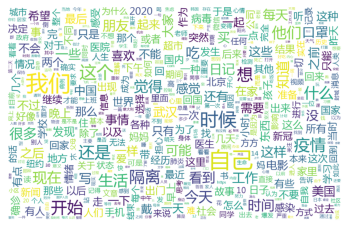

In [17]:
wc_from_word_count(title_counts,'word_cloud_douban.png')

# LDA 


In [19]:
vectorizer = CountVectorizer(min_df=1)
dtm = vectorizer.fit_transform(txt_list)
vocab = vectorizer.get_feature_names()

In [20]:
#LDA topic=10
lda = LatentDirichletAllocation(n_topics=10,n_components=15, max_iter=200,)
l = lda.fit(dtm)
data = pd.DataFrame(l.components_)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
print_top_words(l, vocab,50)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic #0:
美国 电影 中国 疫情 韩国 确诊 宣布 当地 检测 出现 故事 总统 管制 事件 国内 圈子 入境 印度 人类 病毒 美丽 金沙萨 信息 科斯塔 西雅图 据说 病例 对于 死亡 国家 导演 非洲 肺炎 那个 剧情 进行 新增 人们 日记 刚果 认为 护肤 拍摄 刚金 部长 物品 护肤品 瞒报 拍片 奇幻
Topic #1:
电影 公民 巨婴 大哥 德国 妹子 婆婆 读书 小说 故事 作家 房东 楼上 房子 现实 人生 阅读 德语 隔壁 人类 花城 疾病 美丽 东北 老头 卫生间 阿拉伯 天津 猪蹄 柏林 书写 男生 手机 当地 只有 收拾 作者 游客 募捐 红旗 作品 他俩 看过 年轻 喜欢 整理 女人 通过 瘟疫 接着
Topic #2:
咖啡 胶囊 幸福 巴黎 支出 奶茶 复活节 贴纸 冷萃 奥利 名字 利用 爸爸 爷爷 拉面 瑞幸 请见 肉包子 蛤蜊 缺点 总支出 超大 投资 比如说 放在 购物 淘宝 不锈钢 高风险 中杯 玛奇朵 写文章 执念 咖啡豆 卡糖 信用 康师傅 马桶 方便面 信仰 晚餐 如今 信任 体系 家属 送货 咖啡因 引导 硅谷 红薯
Topic #3:
我们 自己 社会 武汉 生活 这个 电影 他们 故事 历史 人们 美国 思考 读后感 居民 宇宙 重要 阅读 节目 不同 看到 成为 事实 同时 出现 导演 镜头 志愿者 这样 留言 本书 那个 好莱坞 社区 世界 影片 只有 发生 人物 存在 作者 使用 你们 虚拟 观众 人类 选择 关系 完全 什么
Topic #4:
安妮 自己 喜欢 日记 我们 生活 书店 方方 选择 日本 那些 什么 电影 有些 这个 打扮 豆瓣 一切 只有 不能 适合 精华 这些 觉得 使用 社会 故事 以及 作品 本书 只是 可能 只能 自我 人类 任何 面膜 有时 丘吉尔 皮肤 人生 认为 音乐 不会 鼠疫 想起 最后 写作 春天 有人
Topic #5:
自己 我们 时候 这个 开始 还是 隔离 疫情 什么 现在 他们 觉得 生活 知道 今天 口罩 朋友 时间 工作 看到 这样 每天 可能 武汉 还有 事情 感觉 日记 大家 之前 之后 这些 需要 起来 晚上 一样 在家 希望 不过 不会 那么 东西 不能 中国 发现 这么 这种 只是 有点 最后
Topic #6:
飞机 攀岩 墨西

In [23]:
font_path='/Users/olivia_wei/Library/Fonts/msyh.ttf'
fontshow = matplotlib.font_manager.FontProperties(fname='/Users/olivia_wei/Library/Fonts/msyh.ttf')


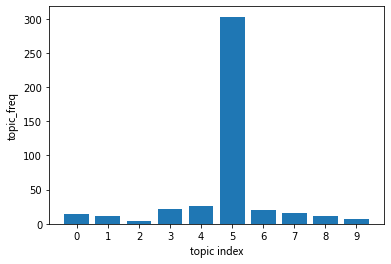

In [25]:
#查看话题分布
topic_dist = l.transform(dtm)

topic_dist =pd.DataFrame(topic_dist)

topic_score = []
for i in range(0,10):
    topic_score.append((str(i),sum(topic_dist[i]))) 

topic_distribution = pd.DataFrame(topic_score)

plt.xlabel('topic index',fontproperties=fontshow)
plt.ylabel('topic_freq',fontproperties=fontshow)
plt.bar(topic_distribution[0],topic_distribution[1])
plt.savefig('topic_freq10——豆瓣.png')